# Aldrees Petroluem's Financial Analysis

This notebook performs a comprehensive financial analysis of Aldrees Petroluem company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the Aldrees Petroluem raw data from the CSV file
aldrees_petroluem_raw_data = pd.read_csv('aldrees_petroluem_data.csv')

# Display the first few rows to understand the data structure
aldrees_petroluem_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Aldrees Petroleum,Energy,5681129,291744,398815,3585220,2710453
1,2020,Aldrees Petroleum,Energy,4974081,121083,205926,4462753,3570271
2,2021,Aldrees Petroleum,Energy,9109615,176805,285131,5435393,4440243
3,2022,Aldrees Petroleum,Energy,12356079,241828,370682,6315582,5206238
4,2023,Aldrees Petroleum,Energy,14834059,280815,421156,7506130,6270210


In [3]:
# Get a summary of the dataset including data types and non-null counts
aldrees_petroluem_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Aldrees Petroluem's financial statements.

In [4]:
# Sort the data by year to ensure chronological order
aldrees_petroluem_raw_data = aldrees_petroluem_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
aldrees_petroluem_raw_data[numeric_cols] = aldrees_petroluem_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
aldrees_petroluem_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Aldrees Petroleum,Energy,5681129.0,291744.0,398815.0,3585220.0,2710453.0
1,2020,Aldrees Petroleum,Energy,4974081.0,121083.0,205926.0,4462753.0,3570271.0
2,2021,Aldrees Petroleum,Energy,9109615.0,176805.0,285131.0,5435393.0,4440243.0
3,2022,Aldrees Petroleum,Energy,12356079.0,241828.0,370682.0,6315582.0,5206238.0
4,2023,Aldrees Petroleum,Energy,14834059.0,280815.0,421156.0,7506130.0,6270210.0
5,2024,Aldrees Petroleum,Energy,19288553.0,338047.0,513334.0,8443323.0,6963836.0


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
aldrees_petroluem_new_data = aldrees_petroluem_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
aldrees_petroluem_new_data['Revenue_Growth_%'] = aldrees_petroluem_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(aldrees_petroluem_new_data['Revenue_SAR'].iloc[0], aldrees_petroluem_new_data['Revenue_SAR'].iloc[-1], len(aldrees_petroluem_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 27.69%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
aldrees_petroluem_new_data['Operating_Margin_%'] = (aldrees_petroluem_new_data['Operating_Income_SAR'] / aldrees_petroluem_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
aldrees_petroluem_new_data['Net_Profit_Margin_%'] = (aldrees_petroluem_new_data['Net_Income_SAR'] / aldrees_petroluem_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(aldrees_petroluem_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019            7.019995             5.135317
1  2020            4.139981             2.434279
2  2021            3.130001             1.940861
3  2022            2.999997             1.957158
4  2023            2.839115             1.893042
5  2024            2.661340             1.752578


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
aldrees_petroluem_new_data['Liabilities_to_Assets_Ratio'] = (aldrees_petroluem_new_data['Total_Liabilities_SAR'] / aldrees_petroluem_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
aldrees_petroluem_new_data['Asset_Turnover_Ratio'] = aldrees_petroluem_new_data['Revenue_SAR'] / aldrees_petroluem_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(aldrees_petroluem_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    75.600744              1.584597
1  2020                    80.001537              1.114577
2  2021                    81.691296              1.675981
3  2022                    82.434810              1.956443
4  2023                    83.534524              1.976259
5  2024                    82.477432              2.284474


## Visualizations

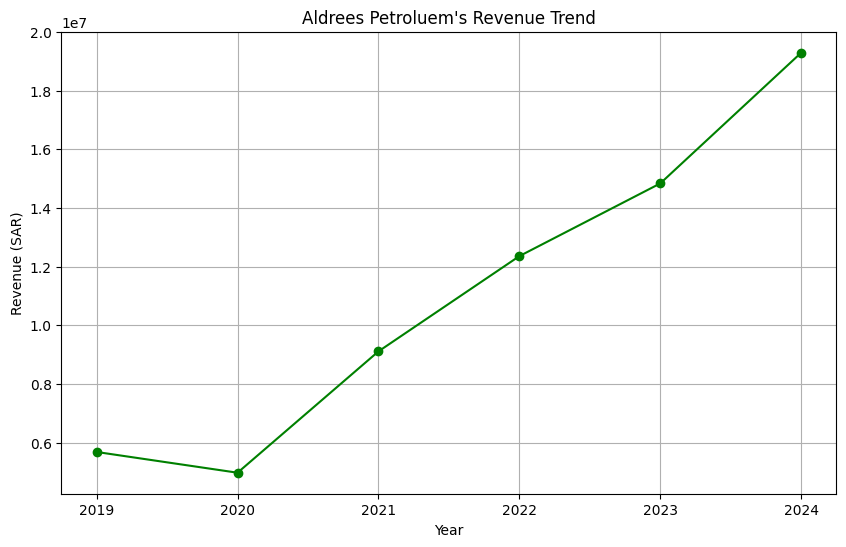

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(aldrees_petroluem_new_data["Year"], aldrees_petroluem_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Aldrees Petroluem's Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

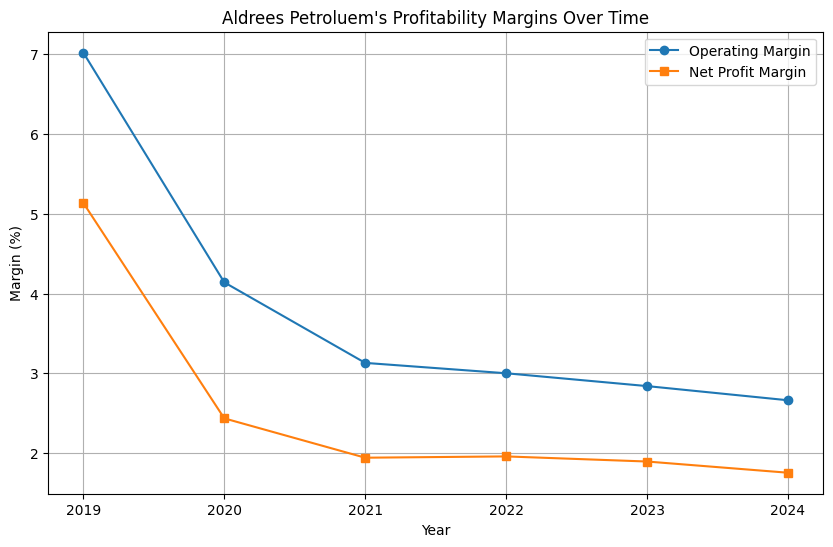

In [10]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(aldrees_petroluem_new_data["Year"], aldrees_petroluem_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(aldrees_petroluem_new_data["Year"], aldrees_petroluem_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Aldrees Petroluem's Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [11]:
# Save the analysis results to a CSV file
aldrees_petroluem_new_data.to_csv('aldrees_petroluem_analysis_results.csv', index=False)
print("Analysis results saved to 'aldrees_petroluem_analysis_results.csv'")

Analysis results saved to 'aldrees_petroluem_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Aldrees Petroluem's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.